<h1>Activity 2: UK Road Accidents </h1>
<hr>
<h3>Analyst: Martin Ryan V. Garay</h3>

<H2>Import Libraries</H2>

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

<H2>Load Dataset into DataFrame</H2>

In [3]:
df = pd.read_csv('Datasets\\uk_road_accident.csv')

<h2>Check DataFrame Information</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h2>Basic Descriptive Statistic</h2>

In [5]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h1>Clearing any Inconsistencies with the Data Set</h1>

In [6]:
df['Accident Data'] = df['Accident Date'].str.strip()
df['Accident Data'] = df['Accident Date'].astype('str')
df['Accident Data'] = df['Accident Date'].str.replace('/', '-')

In [7]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst = True, errors = 'coerce')

In [8]:
df.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Accident Data                      object
dtype: object

<h2>Check and Fill Null Values</h2>

In [9]:
df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
Accident Data                  0
dtype: int64

In [10]:
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0])
df['Road_Type'] = df['Road_Type'].fillna(df['Road_Type'].mode()[0])
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0])
df['Weather_Conditions'] = df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0])

<h1>Extracting Date information using Pandas Date Time</h1>

In [11]:
df['Year'] = df['Accident Date'].dt.year
df['Month'] = df['Accident Date'].dt.month
df['Day'] = df['Accident Date'].dt.day
df['DayOfWeek'] = df['Accident Date'].dt.dayofweek

In [12]:
df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Accident Data              0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<hr>
<H1>Exploratory Data Analytics</H1>

<h2>>Question No.1</h2>
<h3>What type of vehicle is more prone to accidents according to the data?</h3>

<Axes: xlabel='Vehicle_Type'>

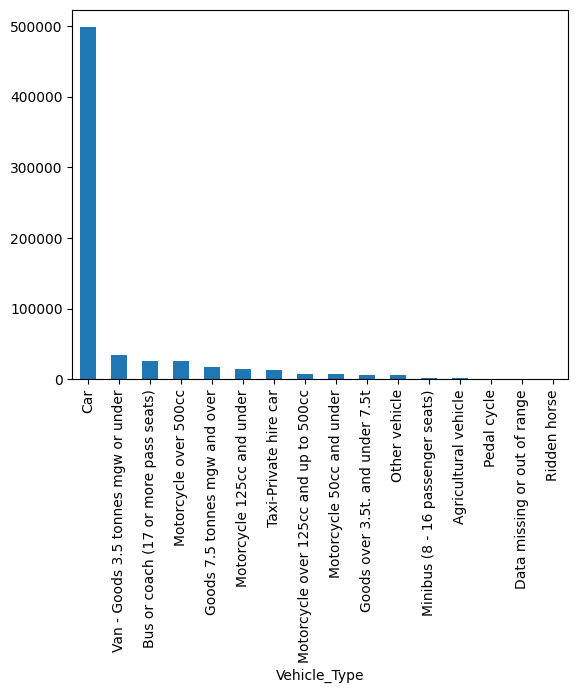

In [61]:
vehicle_type= df['Vehicle_Type'].value_counts().plot(kind='bar')
vehicle_type

<h2>Insight 1:</h2>
<h3>Car vehicles are the most prone to accidents according to the data, bacause of the high number of population that uses car as transportation.</h3>
<h3></h3>
<hr>

<h2>>Question No.2</h2>
<h3>What road condition has the most number of accidents?</h3>

<Axes: xlabel='Road_Surface_Conditions'>

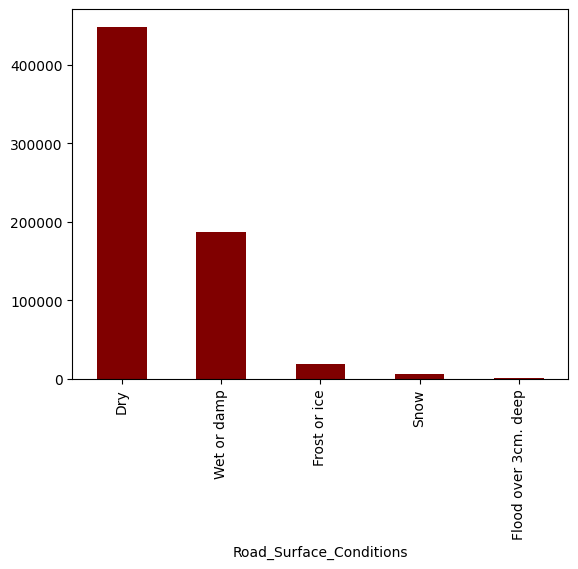

In [73]:
road = df['Road_Surface_Conditions'].value_counts().plot(kind='bar', color = 'maroon')
road

<h2>Insight 2:</h2>
<h3>According to the data, the most number of accident happens on a dry road, this may indicate that driver behavior play a more significant role in accidents </h3>
<h3></h3>
<hr>

<h2>>Question No.3</h2>
<h3>In which lighting situation do the most serious accidents occur?</h3>

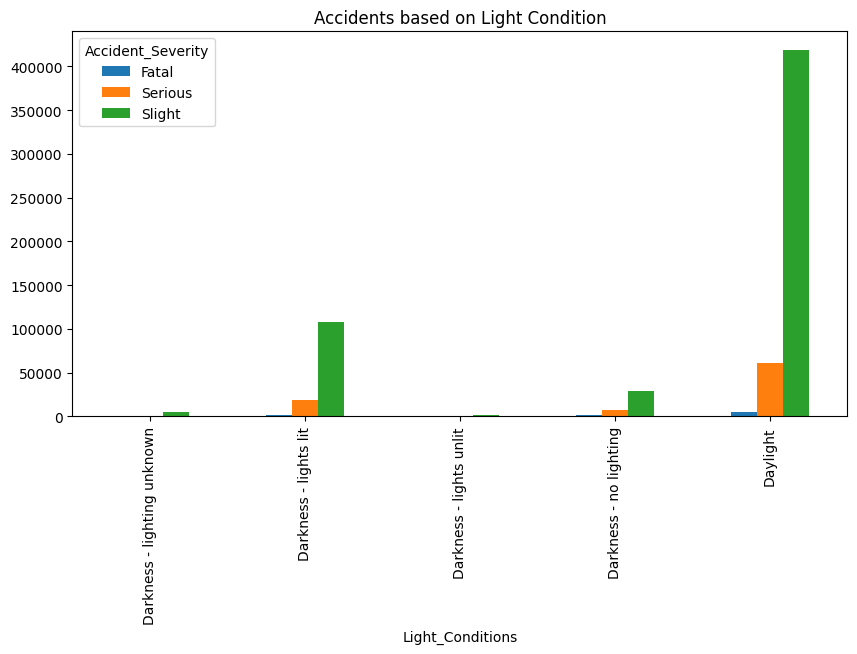

In [87]:
bruh = df.groupby(['Accident_Severity', 'Light_Conditions']).size()

bruh = bruh.unstack(level=0)

bruh.plot(
    kind = 'bar', 
    figsize=(10, 5),
    title='Accidents based on Light Condition'
)

plt.show()

<h2>Insight 3:</h2>
<h3>The data shows that the most severe accidents happens at night time, indicating that poor lighting cause accidents</h3>
<h3></h3>
<hr>

<h2>>Question No.4</h2>
<h3>Which weather condition has the highest number of accidents?</h3>

<Axes: xlabel='Weather_Conditions'>

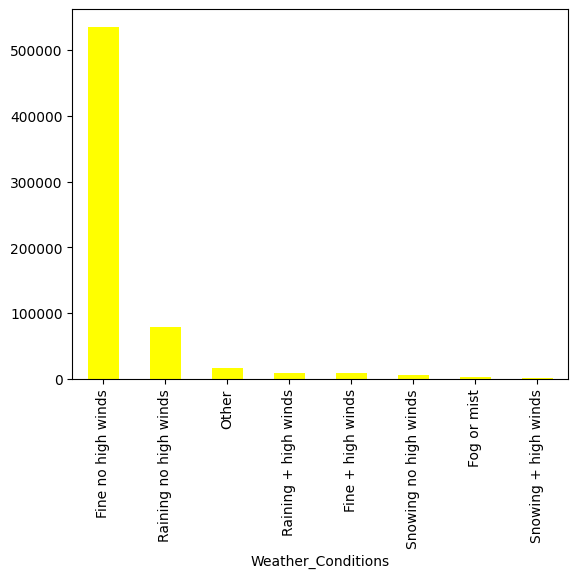

In [86]:
weather = df['Weather_Conditions'].value_counts().plot(kind='bar', color = 'yellow')
weather

<h2>Insight 4:</h2>
<h3>The data shows that most accidents happened when the weather was clear, indicating that poor weather is not the leading cause of accidents.</h3>
<h3></h3>
<hr>

<h2>>Question No.5</h2>
<h3>Are nighttime accidents more common in urban areas or rural areas?</h3>

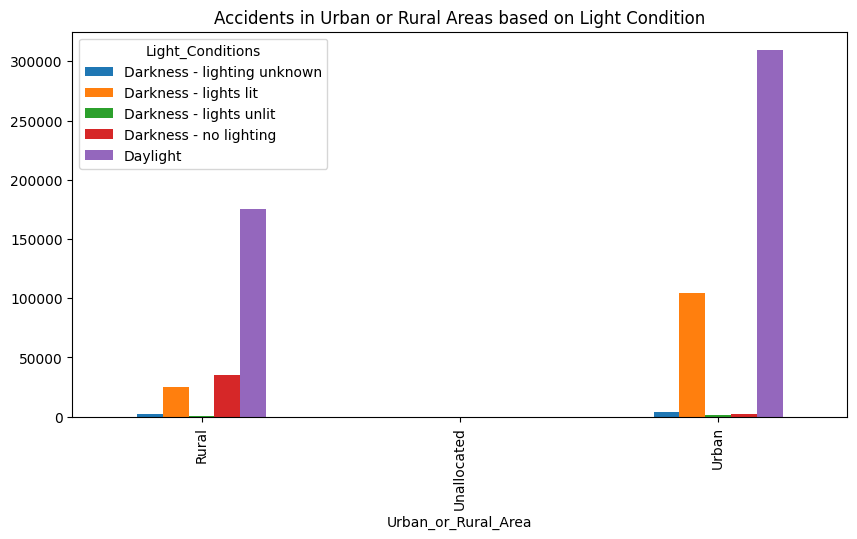

In [91]:
wut = df.groupby(['Light_Conditions', 'Urban_or_Rural_Area']).size()

wut = wut.unstack(level=0)

wut.plot(
    kind = 'bar', 
    figsize=(10, 5),
    title='Accidents in Urban or Rural Areas based on Light Condition'
)

plt.show()

<h2>Insight 5:</h2>
<h3>Nighttime accidents occur more often in urban areas than in rural areas. This indicates that traffic density in cities contributes to more accidents at night. However, under ‘darkness with no lighting,’ rural areas show more accidents, likely due to limited street lighting and visibility.</h3>
<h3></h3>
<hr>

<h2>>Question No.6</h2>
<h3>Which district has the largest number of accidents?</h3>

In [18]:
df['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h2>Insight 6:</h2>
<h3>Based on the data, Birmingham has the highest number of accidents. This suggests that Birmingham is a hotspot for road accidents, likely due to its large population.</h3>
<h3></h3>
<hr>

<h2>>Question No.7</h2>
<h3>Which road type (single carriageway, dual carriageway, roundabout, etc.) sees the most accidents?</h3>

In [19]:
df['Road_Type'].value_counts()

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h2>Insight 7:</h2>
<h3>Most accidents occur on single carriageways, far more than on other road types, likely due to their widespread use and higher traffic exposure.</h3>
<h3></h3>
<hr>

<h2>>Question No.8</h2>
<h3>What is the average number of vehicles per accident?</h3>

In [20]:
df['Number_of_Vehicles'].mean()

np.float64(1.8312554205597575)

<h2>Insight 8:</h2>
<h3>On average, about 1.83 vehicles are involved in each accident, meaning most accidents typically involve two vehicles rather than single-vehicle incidents.</h3>
<h3></h3>
<hr>

<h2>>Question No.9</h2>
<h3>What is the average number of casualties per accident?</h3>

In [21]:
df['Number_of_Casualties'].mean()

np.float64(1.357040257068864)

<h2>Insight 9:</h2>
<h3>On average, each accident results in about 1.36 casualties, showing that most accidents involve at least one person being injured or affected.</h3>
<h3></h3>
<hr>

<h2>>Question No.10</h2>
<h3>Do accidents with more vehicles usually result in more casualties?</h3>

In [22]:
df['Number_of_Vehicles'].corr(df['Number_of_Casualties'])


np.float64(0.22888886126927557)

<h2>Insight 10:</h2>
<h3>There is a weak positive correlation (≈0.23) between the number of vehicles and casualties. This means accidents involving more vehicles tend to have slightly more casualties, but the relationship is not very strong.</h3>
<h3></h3>
<hr>

<h2>>Question No.11</h2>
<h3>Which weather condition is linked to the highest number of severe accidents?</h3>

In [23]:
df.groupby(['Weather_Conditions', 'Accident_Severity']).size()

Weather_Conditions     Accident_Severity
Fine + high winds      Fatal                   175
                       Serious                1245
                       Slight                 7134
Fine no high winds     Fatal                  7207
                       Serious               73285
                       Slight               454521
Fog or mist            Fatal                    82
                       Serious                 483
                       Slight                 2963
Other                  Fatal                   165
                       Serious                1801
                       Slight                15184
Raining + high winds   Fatal                   145
                       Serious                1261
                       Slight                 8209
Raining no high winds  Fatal                   848
                       Serious                9468
                       Slight                69380
Snowing + high winds   Fatal             

<h2>Insight 11:</h2>
<h3>Most severe accidents (fatal and serious) occur under fine weather without high winds. This suggests that good weather may create a false sense of safety,</h3>
<h3></h3>
<hr>

<h2>>Question No.12</h2>
<h3>Which district area had the most accidents involving cars?</h3>

In [24]:
carses = df[df['Vehicle_Type'] == 'Car']['District Area'].value_counts().head(5)
carses

District Area
Birmingham    9600
Leeds         6875
Manchester    5248
Bradford      4749
Sheffield     4306
Name: count, dtype: int64

<h2>Insight 12:</h2>
<h3>Birmingham has the highest number of accidents involving cars. Possibly due to a large number of people owning cars in this district</h3>
<h3></h3>
<hr>

<h2>>Question No.13</h2>
<h3>Which district area had the most accidents with slight severity</h3>

In [25]:
sliacc = df[df['Accident_Severity'] == 'Slight']
sliacc['District Area'].describe()

count         563801
unique           422
top       Birmingham
freq           11912
Name: District Area, dtype: object

<h2>Insight 13:</h2>
<h3>The data shows that Birmingham had the most slightly severe accidents</h3>
<h3></h3>
<hr>

<h2>>Question No.14</h2>
<h3>What is the highest number of casualties recorded in a single accident?</h3>

In [26]:
df['Number_of_Casualties'].max()


np.int64(68)

In [27]:
df[df['Number_of_Casualties']== 68]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident Data,Year,Month,Day,DayOfWeek
117980,200743N002017,Fatal,2019-01-03,51.497547,Darkness - lights lit,South Bucks,-0.496697,68,1,Wet or damp,Slip road,Rural,Raining no high winds,Car,03-01-2019,2019,1,3,3


<h2>Insight 14:</h2>
<h3>The highest number of casualties in a single accident was 68, occurring in South Bucks. This suggests rare but extreme incidents can cause unusually high casualty counts, even involving just one vehicle.</h3>
<h3></h3>
<hr>

<h2>>Question No.15</h2>
<h3>In Urban areas, what type of road surface condition has the most accident happen?</h3>

In [28]:
urbroad = df[df['Urban_or_Rural_Area'] == 'Urban']

urbroad['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     303397
Wet or damp             107698
Frost or ice              7564
Snow                      2788
Flood over 3cm. deep       231
Name: count, dtype: int64

<h2>Insight 15:</h2>
<h3>Accidents mostly happens on dry roads in Urban areas.</h3>
<h3></h3>
<hr>

<h2>>Question No.16</h2>
<h3>What's the average number of casualties by the severity of accident?</h3>

In [29]:
np.round(df.groupby('Accident_Severity')['Number_of_Casualties'].mean(),2)

Accident_Severity
Fatal      1.90
Serious    1.47
Slight     1.33
Name: Number_of_Casualties, dtype: float64

<h2>Insight 16:</h2>
<h3>The data above shows that the average number of casualties, be it in every severity of accidents does not exceeds to more than 2.</h3>
<h3></h3>
<hr>

<h2>>Question No.17</h2>
<h3>Which district has the highest number of Frost or ice road accidents?</h3>

In [30]:
frost = df[df['Road_Surface_Conditions'] == "Frost or ice"].groupby('District Area').size()
mostfrost = frost.idxmax()
mostfrostNum = frost.max()
print(f'{mostfrost} - {mostfrostNum}')

Birmingham - 306


<h2>Insight 17:</h2>
<h3>Birmingham has the highest number of accidents on Frost or ice, with a total of 306</h3>
<h3></h3>
<hr>

<h2>>Question No.18</h2>
<h3>Which weather condition has the highest average number of casualties?</h3>

In [31]:
df.groupby("Weather_Conditions")["Number_of_Casualties"].mean()

Weather_Conditions
Fine + high winds        1.386018
Fine no high winds       1.347397
Fog or mist              1.452948
Other                    1.354869
Raining + high winds     1.416641
Raining no high winds    1.408214
Snowing + high winds     1.418079
Snowing no high winds    1.341776
Name: Number_of_Casualties, dtype: float64

<h2>Insight 18:</h2>
<h3>The highest average casualties per accident happen during fog or mist, showing low visibility is particularly dangerous.</h3>
<h3></h3>
<hr>

<h2>>Question No.19</h2>
<h3>Do Bus accidents increase casualty count more in rural or urban areas?</h3>

In [32]:
df[(df['Vehicle_Type'] == 'Bus or coach (17 or more pass seats)') | 
    (df['Vehicle_Type'] == 'Bus or coach (17 or more pass seats)')].groupby('Urban_or_Rural_Area').size()

Urban_or_Rural_Area
Rural           9025
Unallocated        2
Urban          16851
dtype: int64

<h2>Insight 19:</h2>
<h3>Bus accidents are more frequent in urban areas, with 16851 accidents compared to 9025 in rural areas.</h3>
<h3></h3>
<hr>

<h2>>Question No.20</h2>
<h3>Which light condition (daylight, darkness, etc.) is most associated with Serious accidents?</h3>

In [33]:
light = df[df['Accident_Severity']== 'Serious'].groupby('Light_Conditions').size()
light

Light_Conditions
Darkness - lighting unknown      794
Darkness - lights lit          19130
Darkness - lights unlit          360
Darkness - no lighting          7174
Daylight                       60759
dtype: int64

<h2>Insight 20:</h2>
<h3>Daylight has the highest number of Serious accidents with 60759 accidents, indicating that accidents that cause Serious injuries happen when the sun is still out</h3>
<h3></h3>
<hr>

In [34]:
df['Year'] = df['Accident Date'].dt.year
df['Month'] = df['Accident Date'].dt.month
df['Day'] = df['Accident Date'].dt.day
df['DayOfWeek'] = df['Accident Date'].dt.dayofweek

<h2>>Question No.21</h2>
<h3>What day of the week has the most occurence of accidents from the year 2019 - 2022? <h3>

In [35]:
day_map = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}

df['DayOfWeek'] = df['DayOfWeek'].map(day_map)

accident_occurrence = df.groupby(['DayOfWeek', 'Year']).size().unstack(fill_value=0)
accident_occurrence

Year,2019,2020,2021,2022
DayOfWeek,,,,
Friday,27303,24948,24305,21344
Monday,20386,18750,17861,15683
Saturday,29262,27387,26666,23863
Sunday,24686,23050,22160,19406
Thursday,27300,25830,24799,21582
Tuesday,26251,24381,22972,20946
Wednesday,26927,26245,24791,21595


<h2>Insight 21:</h2>
<h3>Accidents peak on Saturday, showing that weekends are generally riskier compared to weekdays.</h3>
<h2>Insight 22:</h2>
<h3>Monday consistently has the lowest accident counts, suggesting reduced travel activity at the start of the week.</h3>
<h2>Insight 23:</h2>
<h3>Accident numbers gradually declined from 2019 to 2022, likely due to pandemic-related travel restrictions and long-term shifts in mobility.</h3>
<hr>

<h2>>Question No.22</h2>
<h3>How many road accident casualties did the Birmingham get in the year 2019?</h3>

In [36]:
birm_df = df[(df['District Area'] == 'Birmingham') & (df['Year'] == 2019)]
total_casualties = birm_df['Number_of_Casualties'].sum()

print("Total casualties in Birmingham in 2019 =", total_casualties, "casualties")

Total casualties in Birmingham in 2019 = 5231 casualties


<h2>Insight 24:</h2>
<h3>Birmingham recorded 5,231 road accident casualties in 2019, highlighting its high road safety risk. This reflects the city’s dense traffic and busy urban road network.</h3>
<h3></h3>
<hr>

<h2>>Question No.23</h2>
<h3>What month do accidents often happen in Urban Areas?</h3>

In [37]:
month_map = {0: 'January',2: 'February', 3: 'March',4: 'April',5: 'May',6: 'June',7: 'July',8: 'August',9: 'September',10: 'October',11: 'November',12: 'December'}

df['Month'] = df['Month'].map(month_map)

acc_month = df.groupby(['Urban_or_Rural_Area', 'Month']).size().unstack(fill_value=0)
acc_month

Month,April,August,December,February,July,June,March,May,November,October,September
Urban_or_Rural_Area,,,,,,,,,,,
Rural,18432,20998,19361,18140,21215,20200,18806,20125,21352,20786,20035
Unallocated,1,0,3,0,1,2,1,2,0,0,0
Urban,33311,32915,32472,31351,36229,36279,35279,36225,39072,38794,36420


<h2>Insight 25:</h2>
<h3>In Urban areas, accidents peak in November, followed closely by October and September, suggesting higher risks during autumn months.</h3>
<h3></h3>
<hr>

In [38]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [39]:
import folium
from folium.plugins import HeatMap

<br>
<hr>
<br>

<h1>Macclesfield Analysis</h1>
<img src = 'https://cdn.mediavalet.com/eunl/vistry-dam/m2Ab5bboK0C-sm7gYfh12w/hBDTl5Bp0Ue5D7v8G7Cb6w/Custom/NMACC_BOVIS_LOCATION_002.jpg'\>

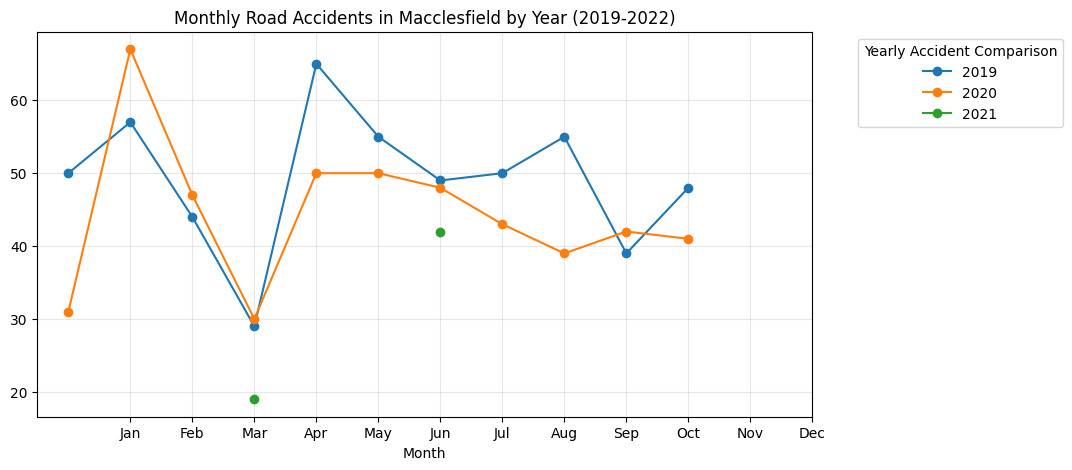

In [40]:
# df.dtypes
macclesfield_df = df[df['District Area'] == 'Macclesfield']

monthly_maccdata = macclesfield_df.groupby(['Year', 'Month']).size()

monthly_maccdata = monthly_maccdata.unstack(level=0)

monthly_maccdata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Macclesfield by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [41]:
locations = list(zip(macclesfield_df['Latitude'], macclesfield_df['Longitude'] ))
m = folium.Map(location=[macclesfield_df['Latitude'].mean(), macclesfield_df['Longitude'].mean()], zoom_start = 10 )
HeatMap(locations).add_to(m)
m.save('accident_heatmap.html')
m

<h2>Insight 26:</h2>
<h3>The chart shows that accident numbers were generally higher in 2019 compared to 2020 and 2021, with 2020 experiencing a sharp drop after February. This decline in 2020 may be due to the pandemic, which likely reduced road traffic.</h3>
<h3></h3>

<h2>Insight 27:</h2>
<h3>Upon observing the heatmap, I noticed that accidents mostly happen on roads with intersections or roundabouts. This indicates that accidents happens on road that has blind spots .</h3>
<h3></h3>

<br>
<hr>
<br>

<h1>Liverpool Analysis</h1>
<img src = 'https://upload.wikimedia.org/wikipedia/commons/f/f0/Liverpoolcityskyline.jpg'\>

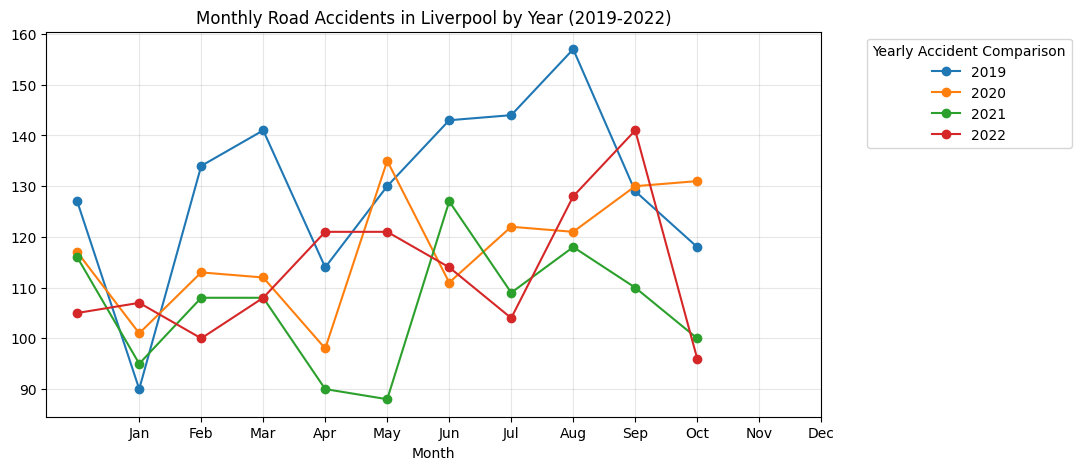

In [42]:
# df.dtypes
liverpool_df = df[df['District Area'] == 'Liverpool']

monthly_liverpooldata = liverpool_df.groupby(['Year', 'Month']).size()

monthly_liverpooldata = monthly_liverpooldata.unstack(level=0)

monthly_liverpooldata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Liverpool by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [43]:
locations = list(zip(liverpool_df['Latitude'], liverpool_df['Longitude'] ))
m = folium.Map(location=[liverpool_df['Latitude'].mean(), liverpool_df['Longitude'].mean()], zoom_start = 10 )
HeatMap(locations).add_to(m)
m.save('accident_heatmap.html')
m

<h2>Insight 28:</h2>
<h3>Accidents were at their peak in 2019, showing it was a risky year. From 2020 to 2022, the overall accidents went down, probably because of the pandemic lockdowns and fewer cars on the road, making traffic a bit calmer. Accidents are also concentrated in roads that has intersections and roundabouts, probably because of the blind spots it makes.</h3>
<h3></h3>


<br>
<hr>
<br>

<h1>Newport Analysis</h1>
<img src = 'https://www.southwalesargus.co.uk/resources/images/17502083.jpg/'\>

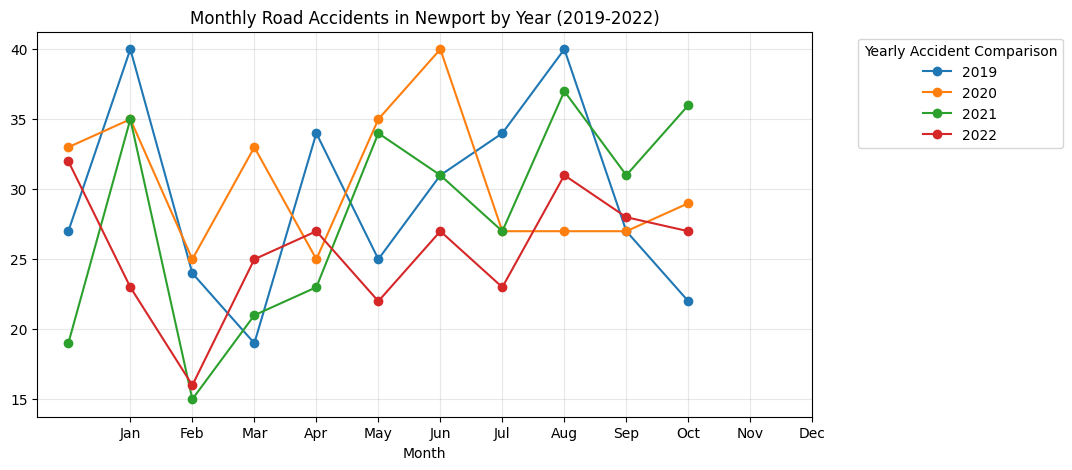

In [44]:
# df.dtypes
newport_df = df[df['District Area'] == 'Newport']

monthly_newportdata = newport_df.groupby(['Year', 'Month']).size()

monthly_newportdata = monthly_newportdata.unstack(level=0)

monthly_newportdata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Newport by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [45]:
locations = list(zip(newport_df['Latitude'], newport_df['Longitude'] ))
m = folium.Map(location=[newport_df['Latitude'].mean(), newport_df['Longitude'].mean()], zoom_start = 10 )
HeatMap(locations).add_to(m)
m.save('accident_heatmap.html')
m

<h2>Insight 29:</h2>
<h3>Newport’s accidents stayed fairly steady across the years, but 2020 showed some noticeable increases. By 2022, the totals dropped and became more stable, which suggests road safety or traffic conditions got better. Accidents in Newport are also mostly on roads with intersections that has a high chance of vehicles colliding.
</h3>
<h3></h3>

<br>
<hr>
<br>

<h1>Highland Analysis</h1>
<img src = 'https://cdn.britannica.com/80/116280-050-BAF9CC5F/River-Severn-Shrewsbury-Shropshire-Eng.jpg'\>

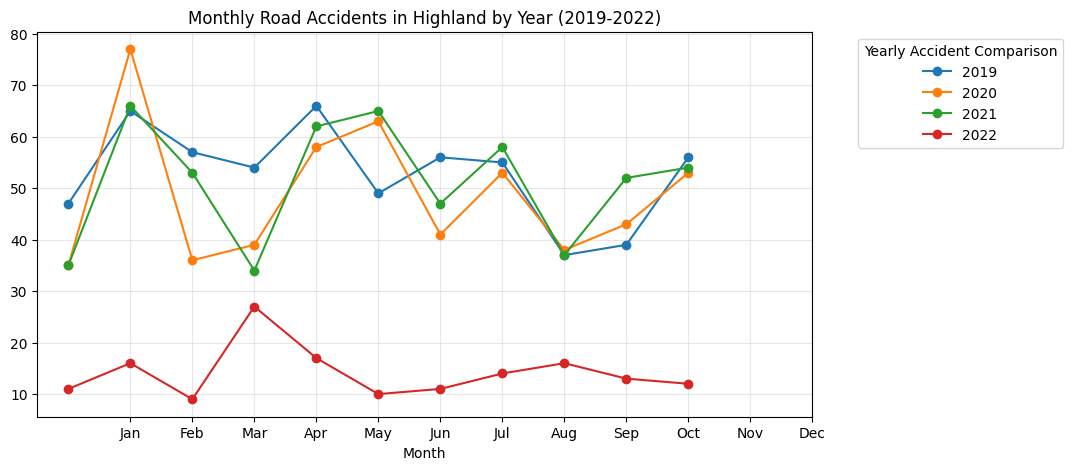

In [46]:
# df.dtypes
highland_df = df[df['District Area'] == 'Highland']

monthly_highlanddata = highland_df.groupby(['Year', 'Month']).size()

monthly_highlanddata = monthly_highlanddata.unstack(level=0)

monthly_highlanddata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Highland by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [47]:
locations = list(zip(highland_df['Latitude'], highland_df['Longitude'] ))
m = folium.Map(location=[highland_df['Latitude'].mean(), highland_df['Longitude'].mean()], zoom_start = 10 )
HeatMap(locations).add_to(m)
m.save('accident_heatmap.html')
m

<h2>Insight 30:</h2>
<h3>Highland had consistently high accidents from 2019 to 2021, making it one of the riskier areas. In 2022, the numbers dropped sharply, pointing to possible improvements in safety or a big change in travel activity.</h3>
<h3></h3>


<br>
<hr>
<br>

<h1>Clackmannshire Analysis</h1>
<img src = 'https://www.shutterstock.com/image-photo/scotland-alloa-town-clackmannanshire-central-600nw-2536730413.jpg'\>

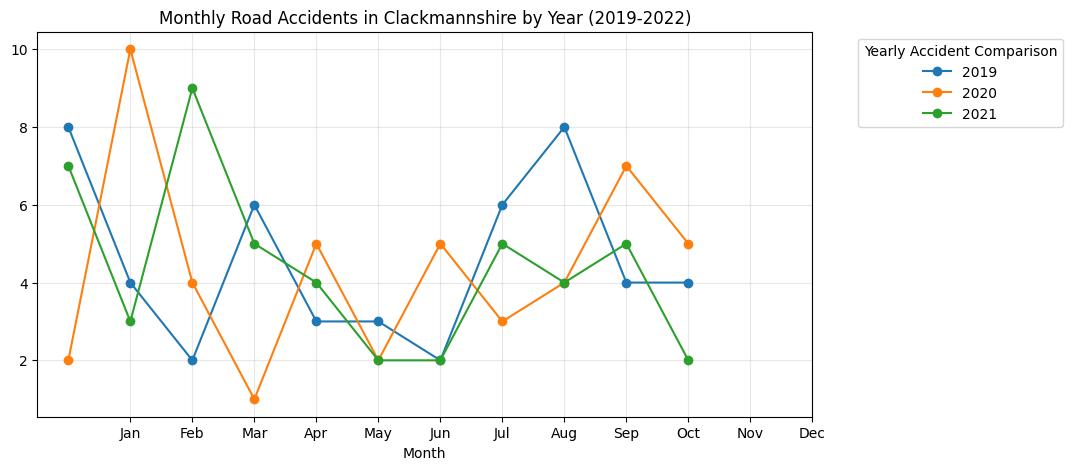

In [48]:
# df.dtypes
clackmannshire_df = df[df['District Area'] == 'Clackmannshire']

monthly_clackmannshiredata = clackmannshire_df.groupby(['Year', 'Month']).size()

monthly_clackmannshiredata = monthly_clackmannshiredata.unstack(level=0)

monthly_clackmannshiredata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Clackmannshire by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [49]:
locations = list(zip(clackmannshire_df['Latitude'], clackmannshire_df['Longitude'] ))
m = folium.Map(location=[clackmannshire_df['Latitude'].mean(), clackmannshire_df['Longitude'].mean()], zoom_start = 10 )
HeatMap(locations).add_to(m)
m.save('accident_heatmap.html')
m

<h2>Insight 31:</h2>
<h3>This area had the lowest number of accidents compared to the others, indicating that it is not a hotspot for accidents compared to others. Maybe because it is a small district with fewer population and few cars. The small yearly changes mean accidents here stayed limited and more controlled.</h3>
<h3></h3>

<br>
<hr>
<br>

<h1>Inverclyde Analysis</h1>
<img src = 'https://www.greenocktelegraph.co.uk/resources/images/10612697/?type=responsive-gallery-fullscreen'\>

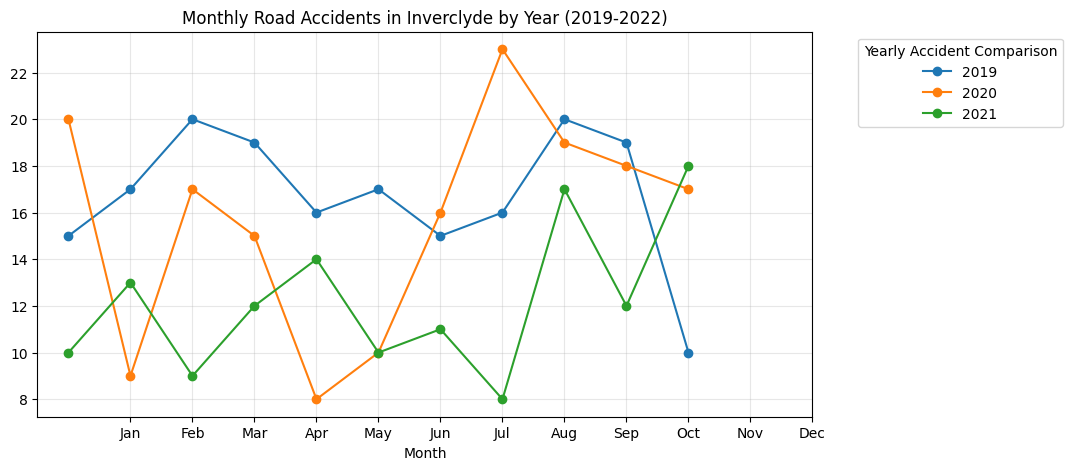

In [50]:
# df.dtypes
inverclydee_df = df[df['District Area'] == 'Inverclyde']

monthly_inverclydeedata = inverclydee_df.groupby(['Year', 'Month']).size()

monthly_inverclydeedata = monthly_inverclydeedata.unstack(level=0)

monthly_inverclydeedata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Inverclyde by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [51]:
locations = list(zip(inverclydee_df['Latitude'], inverclydee_df['Longitude'] ))
m = folium.Map(location=[inverclydee_df['Latitude'].mean(), inverclydee_df['Longitude'].mean()], zoom_start = 10 )
HeatMap(locations).add_to(m)
m.save('accident_heatmap.html')
m

<h2>Insight 32:</h2>
<h3>Inverclyde had a steady number of accidents in 2019, but 2020 was more unpredictable because of the increasing and decreasing number. By 2021, the total went down overall, meaning road conditions or traffic flow likely improved.</h3>
<h3></h3>

<br>
<hr>
<br>